<a href="https://colab.research.google.com/github/juharrais/Projeto_predicao_carro/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução**

Olá candidato(a), o objetivo deste desafio é testar os seus conhecimentos sobre a resolução de problemas de negócios, análise de dados e aplicação de modelos preditivos. Queremos testar seus conhecimentos dos conceitos estatísticos de modelos preditivos, criatividade na resolução de problemas e aplicação de modelos básicos de machine learning.  É importante deixar claro que não existe resposta certa e que o que nos interessa é sua capacidade de descrever e justificar os passos utilizados na resolução do problema.

**Desafio**

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente que o core business é compra e venda de veículos usados. Essa empresa está com dificuldades na área de revenda dos automóveis usados em seu catálogo.
Para resolver esse problema, a empresa comprou uma base de dados de um marketplace de compra e venda para entender melhor o mercado nacional, de forma a conseguir precificar o seu catálogo de forma mais competitiva e assim recuperar o mau desempenho neste setor.
Seu objetivo é analisar os dados para responder às perguntas de negócios feitas pelo cliente e criar um modelo preditivo que precifique os carros do cliente de forma que eles fiquem o mais próximos dos valores de mercado.

Para isso são fornecidos dois datasets:
Um dataset para treinamento chamado cars_training composto por 29584 linhas, 28 colunas de informação (features) e a variável a ser prevista (“preco”).
Um segundo dataset para teste chamado de cars_test composto por  9862 linhas e 28 colunas, sendo que este dataset não possui a coluna “preco”.

Seu objetivo é prever a coluna "preco" coluna a partir dos dados enviados e nos enviar para avaliação dos resultados.



Essa implementação foi baseada em: https://www.kaggle.com/code/ngawangchoeda/linear-models-to-predict-car-price


In [ ]:
import os
import pandas as pd
import numpy as np

#matplotlib and seaborn are imported for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#splitting the dataset into train & test data
from sklearn.model_selection import train_test_split

#GridSearchCV is used for hyperparameter tuning in Lasso & Ridge
from sklearn.model_selection import GridSearchCV

#three linear models used in the project
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#StandardScaler for preprocessing the dataset
from sklearn.preprocessing import StandardScaler

#metrics to evaluate the linear regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#import warnings to ignore any warnings during execution
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # needs to authenticate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#carregando o arquivo .csv de dentro do drive:
car_dataset = pd.read_csv('/content/drive/MyDrive/Projeto/cars_train.csv',
                          encoding='utf-16',
                          sep='\t')

In [ ]:
#informacao sobre o dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [ ]:
#de cara eu sei que nao vou utilizar as colunas id e num_fotos, portanto, vou remover
df_car = car_dataset.drop(['id', 'num_fotos'], axis=1)
#verificando se foi realmente deletado
df_car.columns

Index(['marca', 'modelo', 'versao', 'ano_de_fabricacao', 'ano_modelo',
       'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor',
       'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante',
       'entrega_delivery', 'troca', 'elegivel_revisao', 'dono_aceita_troca',
       'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago',
       'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda',
       'veiculo_alienado', 'preco'],
      dtype='object')

In [ ]:
df_car.head()

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,N,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,N,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,N,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,N,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,N,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [ ]:
#ta cheio de NaN e para os modelos de Machine Learning precisamos substituir esses NaN
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marca                    29584 non-null  object 
 1   modelo                   29584 non-null  object 
 2   versao                   29584 non-null  object 
 3   ano_de_fabricacao        29584 non-null  int64  
 4   ano_modelo               29584 non-null  float64
 5   hodometro                29584 non-null  float64
 6   cambio                   29584 non-null  object 
 7   num_portas               29584 non-null  int64  
 8   tipo                     29584 non-null  object 
 9   blindado                 29584 non-null  object 
 10  cor                      29584 non-null  object 
 11  tipo_vendedor            29584 non-null  object 
 12  cidade_vendedor          29584 non-null  object 
 13  estado_vendedor          29584 non-null  object 
 14  anunciante            

In [ ]:
# método isnull() verifica se o valor é NaN ou não. Nesse caso, se o valor for NaN, este será substituído por True, se não, será retornado False.
#Combinar esse método junto com a função sum(), permite uma verificação de quantos dados NaN possuímos por coluna.
df_car.isnull().sum()

marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

In [ ]:
#Eliminação de colunas com dados NaN
df_car = df_car.dropna(inplace = False, axis = 1)

In [ ]:
#verificando se todas as colunas que continham NaN foram deletadas
df_car.isnull().sum()

marca                0
modelo               0
versao               0
ano_de_fabricacao    0
ano_modelo           0
hodometro            0
cambio               0
num_portas           0
tipo                 0
blindado             0
cor                  0
tipo_vendedor        0
cidade_vendedor      0
estado_vendedor      0
anunciante           0
entrega_delivery     0
troca                0
elegivel_revisao     0
preco                0
dtype: int64

In [ ]:
#Precisa dividir o dataset em variáveis dependentes (y) e independentes (X)
#a variavel dependente é  a nossa targert, e nesse caso queremos achar o preço!
X = df_car.drop(columns=["preco"])
y  =df_car["preco"]

Especifique duas listas vazias cat_col & num_col para armazenar colunas categóricas e numéricas, respectivamente

In [ ]:
cat_col=[]
num_col=[]

#Iterando as colunas em X
for col in X:
    if df_car[col].dtype=="O":
        cat_col.append(col)

    else:
        num_col.append(col)


Create dataFrames df_cat & df_num to store the features with datatypes object and numerical respectively

By dividing the dataframe into numerical & categorical features seperately, it will allow an ease handling of numerical and categorical features in their respective dataframes.

In [ ]:
#dataframe to store the categorical features
df_cat=pd.DataFrame(
    data=df_car,
    #we will use the column names from the cat_col list
    columns=cat_col
)

#dataframe to store the categorical features
df_num=pd.DataFrame(
    data=df_car,
    #we will use the column names from the num_col list
    columns=num_col
)

In [ ]:
#Display head of Dataframe with numerical features
df_num.head()

,ano_de_fabricacao,ano_modelo,hodometro,num_portas,entrega_delivery,troca,elegivel_revisao
0,2017,2017.0,67772.0,4,False,False,False
1,2017,2017.0,62979.0,4,False,False,False
2,2018,2019.0,44070.0,4,True,False,False
3,2013,2015.0,85357.0,4,True,True,False
4,2013,2015.0,71491.0,4,False,False,False


In [ ]:
#Display head of Dataframe with categorical features
df_cat.head()

,marca,modelo,versao,cambio,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante
0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,CVT,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física
1,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,Automática,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física
2,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,Automática,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,Automática,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,Automática,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física


In [ ]:
#Print the labels of each columns in df_cat
for cols in df_cat:
    print(cols," contains :",df_cat[cols].nunique()," labels")

marca  contains : 40  labels
modelo  contains : 457  labels
versao  contains : 1916  labels
cambio  contains : 7  labels
tipo  contains : 7  labels
blindado  contains : 2  labels
cor  contains : 7  labels
tipo_vendedor  contains : 2  labels
cidade_vendedor  contains : 575  labels
estado_vendedor  contains : 25  labels
anunciante  contains : 4  labels


ince the dataset does not contain any null values hence the df_num & df_cat will also have no null values, however we are intrested in df_cat whose datatype is object.

To feed our data to the Machine Learning Models the data values must be converted into numerical values.

Perform one-hot encoding to the categorical features, using pd.get_dummies()

In [ ]:
df_cat=pd.get_dummies(
    data=df_cat,
    drop_first=True
)

In [ ]:
#Display the head of one-hot encoded dataframe
df_cat.head()

,marca_AUDI,marca_BMW,marca_BRM,marca_CHERY,marca_CHEVROLET,marca_CHRYSLER,marca_CITROËN,marca_DODGE,marca_EFFA,marca_FERRARI,...,estado_vendedor_Rio de Janeiro (RJ),estado_vendedor_Rondônia (RO),estado_vendedor_Roraima (RR),estado_vendedor_Santa Catarina (SC),estado_vendedor_Sergipe (SE),estado_vendedor_São Paulo (SP),estado_vendedor_Tocantins (TO),anunciante_Concessionária,anunciante_Loja,anunciante_Pessoa Física
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


Now we have converted categorical features into numerical values by perfoming one-hot encoding & now we have all the features on both df_num & df_cat in numerical form so we concatenate them to get the final desired dataframe.

In [ ]:
car_final=pd.concat(
    [df_num,df_cat,y],
    axis=1
)

In [ ]:
#Split the data into dependent(y) and independent(X) variables
X=car_final.drop("preco",
                axis=1)
y=car_final["preco"]

In [ ]:
#Split the data into training and testing data, with test data of size of 20% of total dataset.
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.2
)

Perform preprocessing on the X_train and X_test using StandardScaler()

It will scale the data values in such a way that the mean is zero and a variance of one



In [ ]:
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Since I am comparing three linear models namely LinearRegression() Ridge() & Lasso(), I will have to write the same codes again and again for individual linear models so I have used functions that would perform the same job for all three regression models to ease and shorten my work

The function is used to fit the models in given linear model and return training and testing scores

In [ ]:
#the function takes model, train & test split as an argument
def fit_model_getScores(model,X_train,y_train,X_test,y_test):
    #fit the model with training dataset
    model.fit(X_train,y_train)

    #score the training data
    train_score=model.score(X_train,y_train)
    #score the test data
    test_score=model.score(X_test,y_test)

    #Display the scores
    print("Scores of {}".format(model),"\n")
    print("Training Score:{:.2f}".format(train_score))
    print("Testing Score:{:.2f}".format(test_score))

The function given below will help return the metrics used for evaluating linear models & that includes mse,mae,rmse,r2_score



In [ ]:
#function takes model,and test data split as an argument
def get_metrics(model,X_test,y_test):
    #calculate the predicted value of y
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)#mse
    r2__score=r2_score(y_test,y_pred)#r2_score
    mae=mean_absolute_error(y_test,y_pred)#mae
    rmse=mean_squared_error(y_test,y_pred,squared=False)#rmse

    #print the metrics
    print("The Metrics for {}:".format(model))
    print("----------------------------")
    print("Mean Squared Error:{:.2f}".format(mse))
    print("Root Mean Squared Error:{:.2f}".format(rmse))
    print("Mean Absolute Error:{:.2f}".format(mae))
    print("r2_score:{:.2f}".format(r2__score))

This function will calculate the coefficient of a given linear model and will return the series of coefficient with independent features(columns) as an index.

Note: In a linear model the numbers(count) of coefficient is always equal to the number of independent features present in the dataset



In [ ]:
#the function takes model and independent dataframe as an argument
def return_coef_series(model,X):
    #it will give the coefficeint pertaining to a specific linear model
    coef=model.coef_

    #make a series out of coefficient with columns of X as an index
    coef_series=pd.Series(
        data=coef,
        index=X.columns
    )

    #return the series
    return coef_series

The plot_coef() will help visualize the coefficient of a particular linear model



In [ ]:
#takes coefficient of linear_model as an argument
def plot_coef(model_coef):
    fig=plt.figure(figsize=(12,8))
    model_coef.plot(
        kind="bar"
    )
    plt.xticks(rotation=90)


The below given function is used to perform hyper-parameter tuning for Ridge() and Lasso() regression.

GridSearchCV is used for hypertuning and return the best parameters fitting the linear model.



In [ ]:
#takes model, user-defined hyper-parameters, train & test data splits as argument
def gridSearch(model,params,X_train,y_train):
    grid=GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=5
    )
    grid.fit(X_train,y_train)

    return grid.best_params_

BUILDING LINEAR MODELS

1-LinearRegression() Model

LinearRegression(aka ordinary least squares): Simplest & most classic linear method for regression. It finds the parameters w & b that minimize the mean squard error between predicted value and true value.

y=wx + b

w->Weights associated with individual independent features(Slope of a line)

b->y intercept

In [ ]:
#initializing the model
linear_model=LinearRegression()

Lets fit the LinearRegression and fetch training and testing scores



In [ ]:
fit_model_getScores(linear_model,
                    X_train_scaled,y_train,
                    X_test_scaled,y_test
                   )

Scores of LinearRegression() 

Training Score:0.73
Testing Score:-1178104971670792505439289344.00


Get the metrics to evaluate LinearRegression



In [ ]:
get_metrics(linear_model,
            X_test_scaled,y_test
           )

The Metrics for LinearRegression():
----------------------------
Mean Squared Error:7474697650590424852767458376651112448.00
Root Mean Squared Error:2733989328909391360.00
Mean Absolute Error:172001793492287936.00
r2_score:-1178104971670792505439289344.00


The function return_coef_series will return the series of coefficient along with features as its index.

> Bloco com recuo





In [ ]:
linear_coef=return_coef_series(linear_model,X).sort_values()
linear_coef

versao_1.5 T5 RECHARGE MOMENTUM GEARTRONIC        -7.453606e+17
versao_2.0 MI 8V GASOLINA 4P MANUAL               -6.356983e+17
versao_1.6 I GLX 16V FLEX 4P MANUAL               -6.111710e+17
cidade_vendedor_Guaranésia                        -5.056124e+17
versao_1.8 MI GL 8V GASOLINA 4P MANUAL            -5.050303e+17
                                                       ...     
versao_3.2 ELEGANCE V6 GASOLINA 2P AUTOMÁTICO      5.348867e+17
modelo_PICANTO                                     5.564773e+17
versao_3.8 EX 4X4 V6 24V GASOLINA 4P AUTOMÁTICO    5.978926e+17
modelo_POLO SEDAN                                  6.367663e+17
versao_1.4 TSI 16V TURBO GASOLINA 4P DSG           6.847509e+17
Length: 3038, dtype: float64

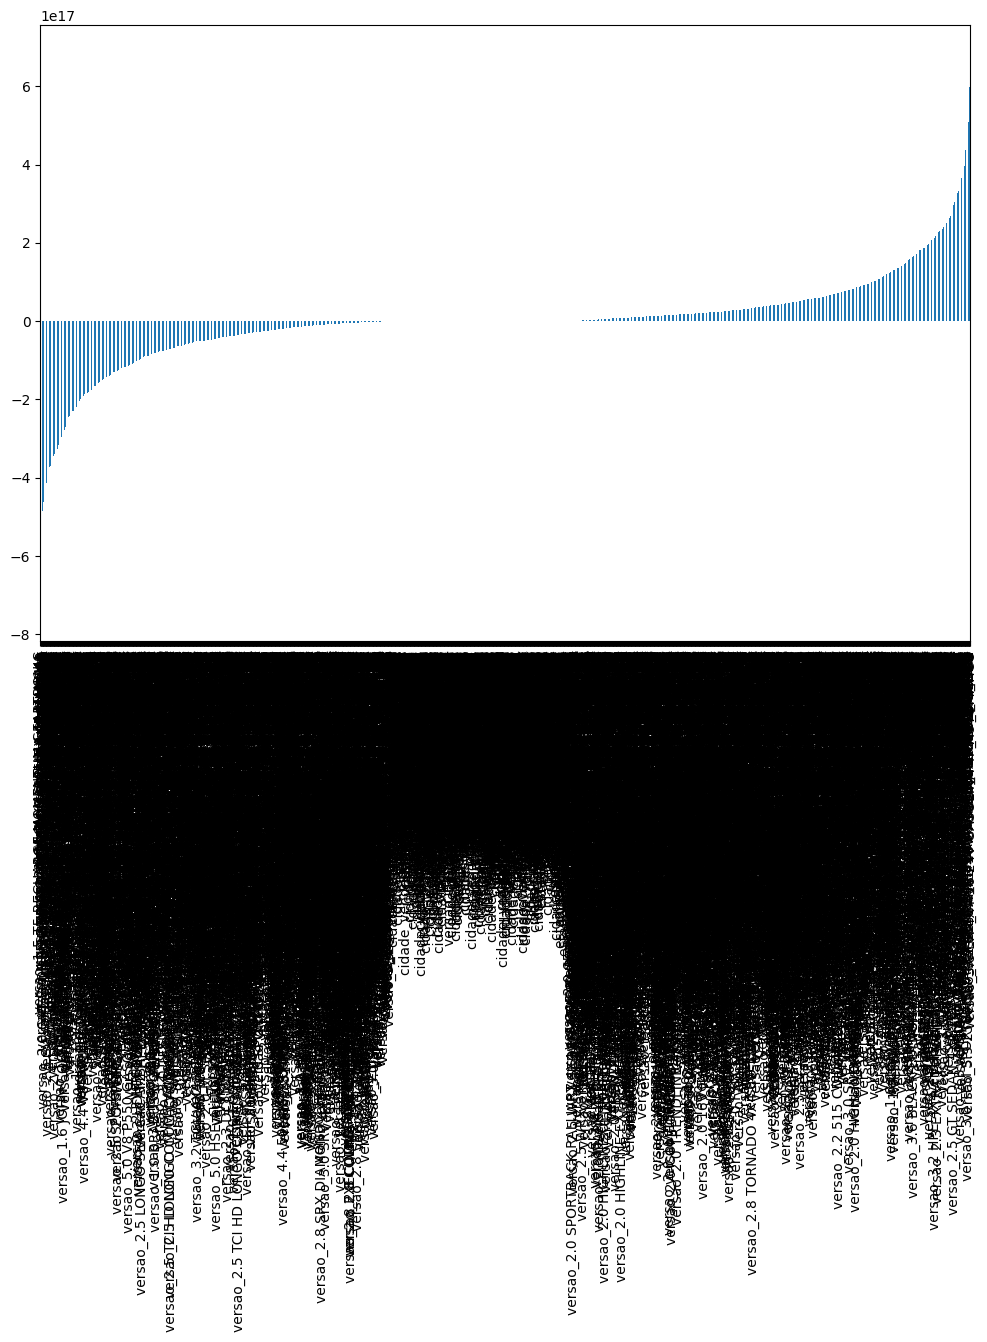

In [ ]:
plot_coef(linear_coef)

2-Ridge(): It is a linear model which uses L2 regularization technique.

L2 Regularization: Regularization techniques explicitly restricts a model to aviod overfitting.

LinearRegression() does not allow us to control its complexity so its very likely that it will overfit the models when the dataset is relatively small.

l2 regularization reduces the cofficient of the independent features to small magnitude as possible i.e all entries of w should be close to zero

Ridge have alpha parameter which makes a trade-off between the simplicity of the model and its perfomance on training set & hence tuning it will yeild different model performance.

Lets perform Hyperparameter tuning and fit the ridge model with the best parameters generated by GridSeachCV hypertuning method

GridSeachCV gave us alpha=1 and max_iter=1000 as the best parameters for the model

In [ ]:
ridge_model=Ridge()

Fit the ridge model and return the test and train scores

Fitting the model we get scores equivalent to the LinearRegression()

In [ ]:
fit_model_getScores(ridge_model,
                    X_train_scaled,y_train,
                    X_test_scaled,y_test
                   )

Scores of Ridge() 

Training Score:0.78
Testing Score:0.71


In [ ]:
get_metrics(ridge_model,
            X_test_scaled,y_test
           )

The Metrics for Ridge():
----------------------------
Mean Squared Error:1845779827.64
Root Mean Squared Error:42962.54
Mean Absolute Error:28270.77
r2_score:0.71


Get the coefficeint series of ridge model

From the values returned in series, we can see that the coefficients have been reduced to the fractions of its original value.

L2 regularization technique in Ridge reduces the coefficient the features as close to zero.

In [ ]:
ridge_coef=return_coef_series(ridge_model,X).sort_values()
ridge_coef

tipo_Sedã                                        -49520.950547
tipo_Hatchback                                   -38067.782868
tipo_Picape                                      -33304.535159
tipo_Utilitário esportivo                        -20780.909451
hodometro                                        -12467.742172
                                                      ...     
modelo_HILUX                                       6025.519806
marca_PORSCHE                                      6622.912959
versao_2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO     6631.360157
cambio_Manual                                      6885.753086
ano_modelo                                         7166.111567
Length: 3038, dtype: float64

Visualize the coefficient series of ridge model

We can see that the upper & lower x-limmits have been reduced.



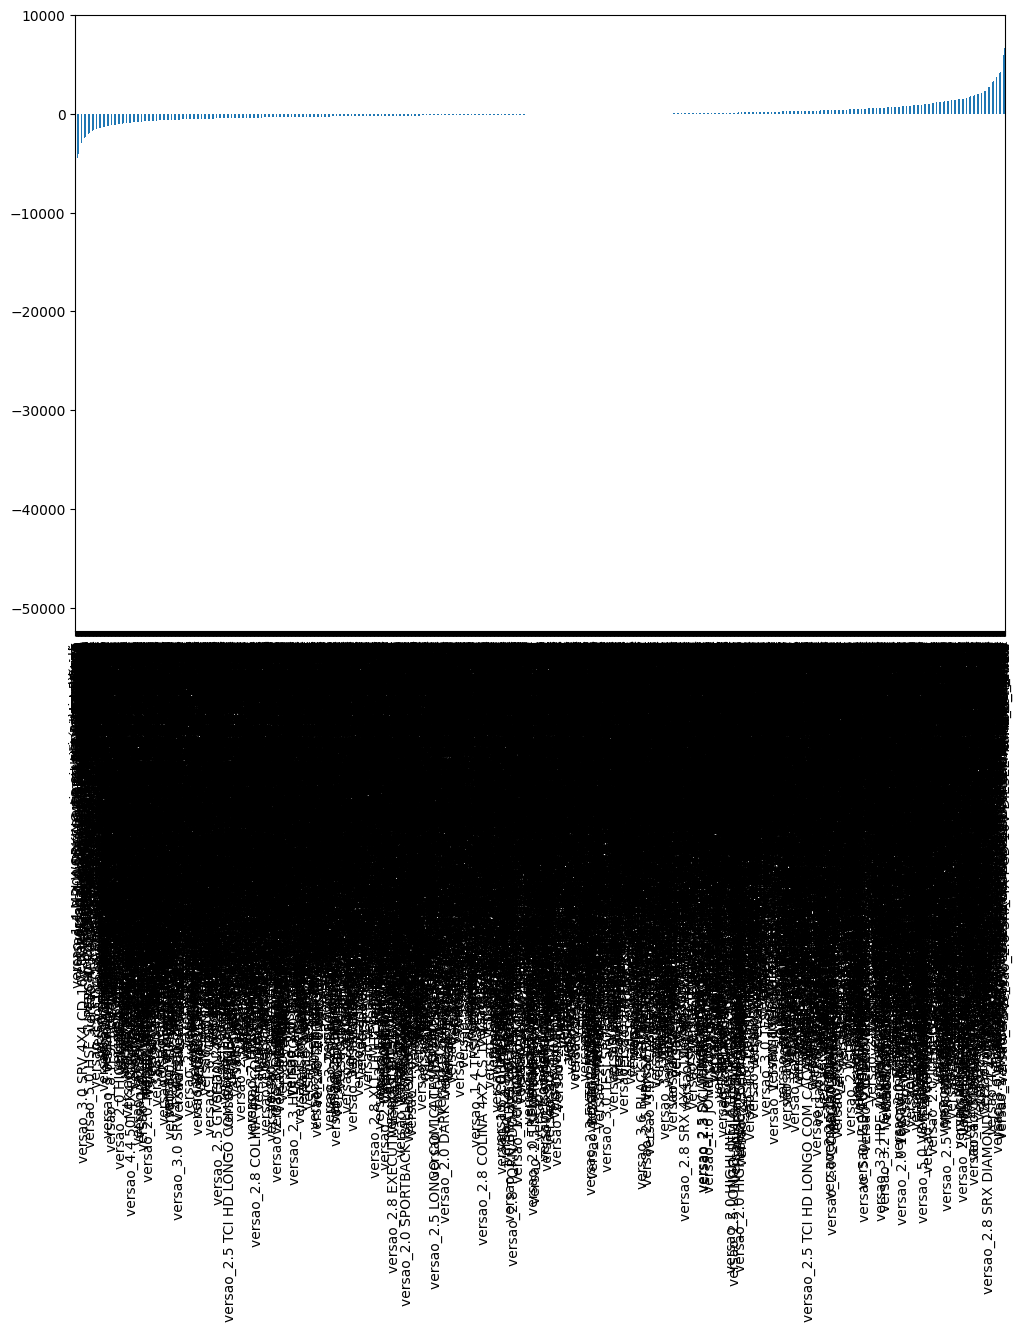

In [ ]:
plot_coef(ridge_coef)

3-Lasso(): It is a linear model which uses L1 regularization technique.

l1 regularization also reduces the coefficient magnitude however unlike Ridge it reduces magnitude of some of the features to zero. Hence it neglects some of the features completely.

Hence it is also used for automatic feature selection as it ignores some of the features.

Lasso also have alpha parameter which makes a trade-off between the simplicity of the model and its perfomance on training set & hence tuning it will yeild different model performance.

In [ ]:
lasso_model=Lasso()

We got alpha=100 & max_iter=1000 for the lasso model



In [ ]:
fit_model_getScores(lasso_model,
                    X_train_scaled,y_train,
                    X_test_scaled,y_test
                   )

Scores of Lasso() 

Training Score:0.78
Testing Score:0.71


Lets see the magnitude of coefficients returned by the lasso model.

This is where it gets very intresting we can see that there are many features whose cofficients are reduced to zero. It means that the Lasso model have completely ignored those features with coefficients equals to zero while fitting the model.

In [ ]:
lasso_coef=return_coef_series(lasso_model,X).sort_values()
lasso_coef

tipo_Sedã                   -44054.320212
tipo_Hatchback              -33960.873488
tipo_Picape                 -29253.586204
tipo_Utilitário esportivo   -17296.912310
hodometro                   -12488.566205
                                 ...     
modelo_HILUX                  9556.520244
marca_LAND ROVER             11184.033004
marca_RAM                    11838.338726
marca_BMW                    15486.362156
marca_PORSCHE                16783.603078
Length: 3038, dtype: float64

Lets create Dataframe that stores the features with its corresponding coefficient values



In [ ]:
lasso_coef_df=pd.DataFrame(
    data=lasso_coef,
    columns=["Coefficient"]
)
lasso_coef_df

,Coefficient
tipo_Sedã,-44054.320212
tipo_Hatchback,-33960.873488
tipo_Picape,-29253.586204
tipo_Utilitário esportivo,-17296.912310
hodometro,-12488.566205
...,...
modelo_HILUX,9556.520244
marca_LAND ROVER,11184.033004
marca_RAM,11838.338726
marca_BMW,15486.362156


Lets us see how many features have been used in the model and how many have been neglected by the Lasso mod

The dataframes below shows the features as an indexes whose coefficient has been reduced to zero and are completely neglected by the Lasso model

In [ ]:
features_used=lasso_coef_df[lasso_coef_df["Coefficient"]==0]
features_used

,Coefficient
versao_5.5 GUARD VR4 V8 GASOLINA 4P AUTOMÁTICO,0.0
modelo_GRAND VITARA,-0.0
cidade_vendedor_Santa Vitória,0.0
modelo_E-PACE,0.0
versao_2.5 TD DIESEL STD CS MANUAL,0.0
...,...
versao_1.6 LTZ 16V FLEX 4P AUTOMÁTICO,0.0
modelo_RANGE ROVER VOGUE,-0.0
cidade_vendedor_Miracema,0.0
versao_1.4 TFSI AMBIENTE GASOLINA 4P S TRONIC,0.0


In [ ]:
print("Total Features:{}".format(X.shape[1]))
print("Features Neglected:{}".format(features_used.shape[0]))
print("Features Used:{}".format(X.shape[1]-features_used.shape[0]))

Total Features:3038
Features Neglected:407
Features Used:2631


Its is very clear from the plot that many of the features are neglected and its bar are being reduced to 0 magnitude, and hence lasso is moslty used for automatic feature selection.

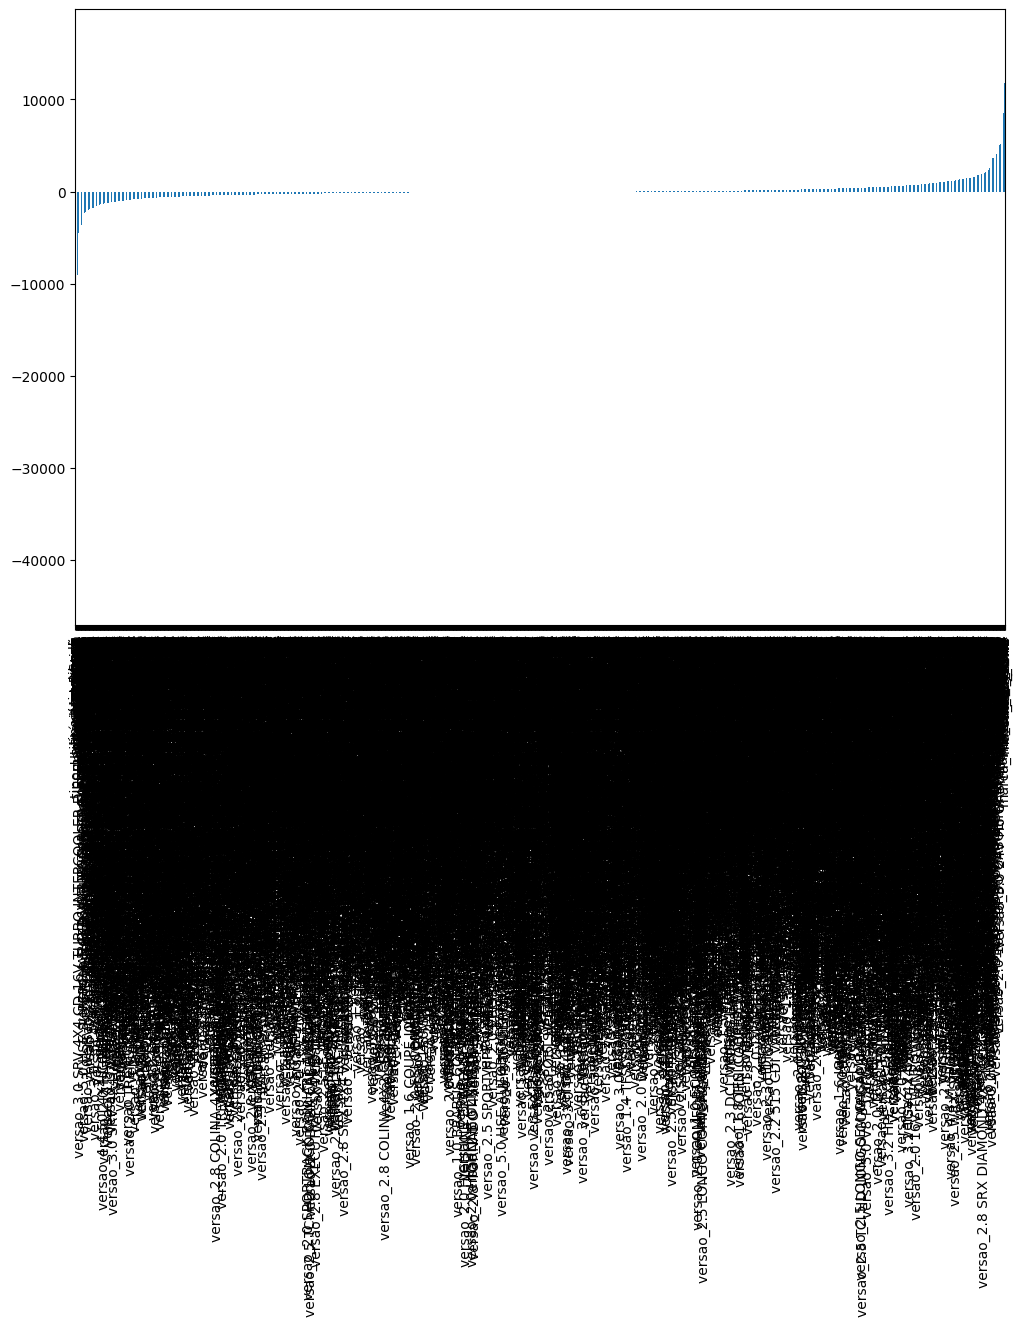

In [ ]:
plot_coef(lasso_coef)

Comparison between the three Linear Models:

From the plot below comparing the coefficient of independent features, its clear that LinearRegression() model have most coefficients nonzero and are of large magnitude and most of its values are out of y-lim, Which are represented by blue square blocks.

The Ridge() model however have the coefficents whose magnitude are smaller and are close to zero, which are represented with orange '^'.

Comming to Lasso() model most of its values are lying either on the horizotal line and few which are very close to horizontal line, owing to its smaller magnitude represented by green 'v'

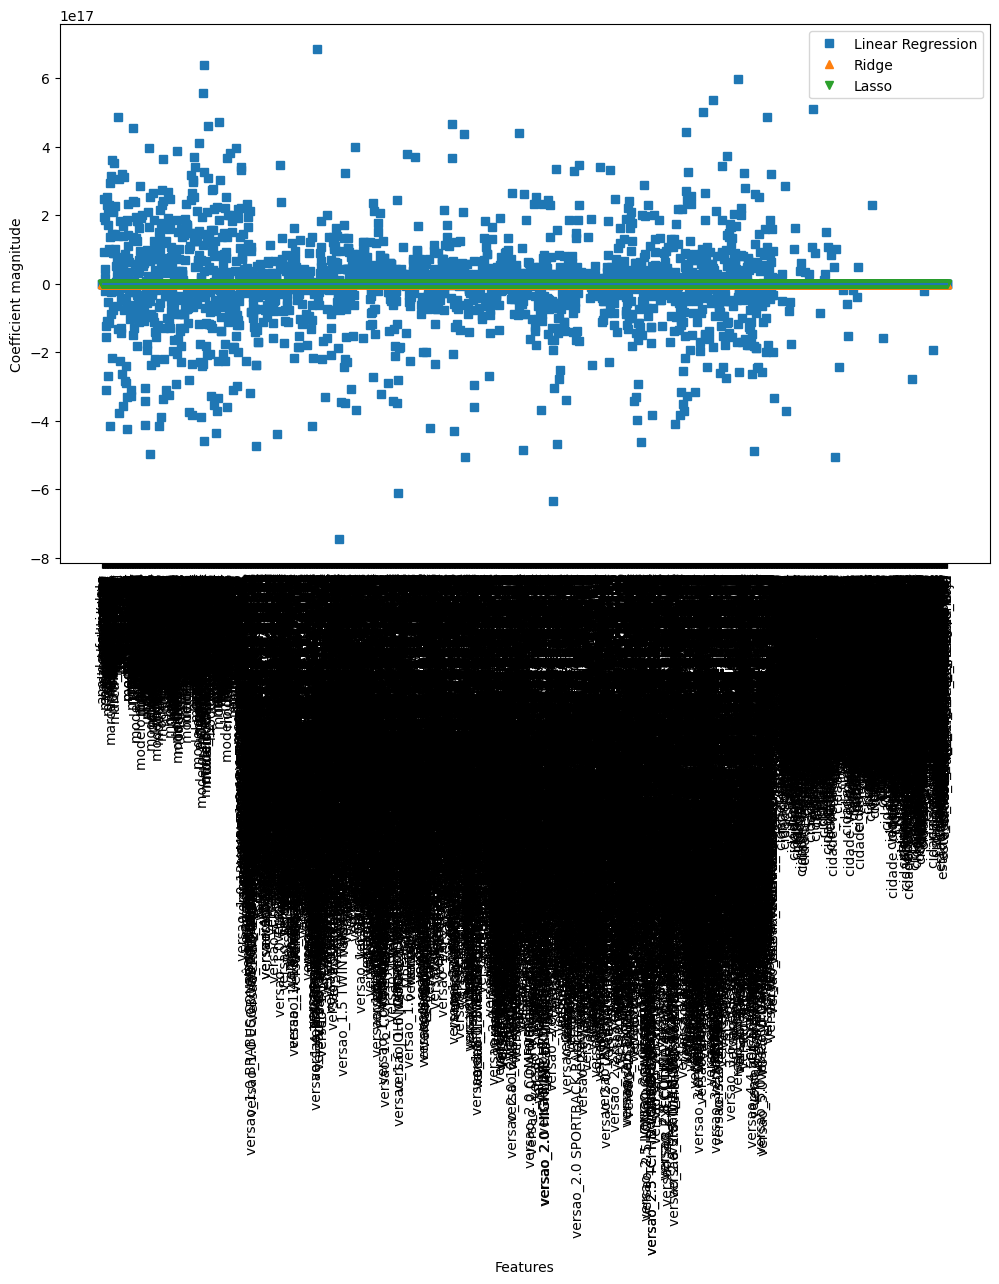

In [ ]:
#specify the figure & size
fig=plt.figure(figsize=(12,7))

#plot the coefficient of individual linear models
plt.plot(linear_model.coef_,'s',label="Linear Regression")
plt.plot(ridge_model.coef_,'^',label="Ridge")
plt.plot(lasso_model.coef_,'v',label="Lasso")

#specify columns/features as the xticks
plt.xticks(range(X.shape[1]), X.columns,rotation=90)

#the length of horizontal line equals to the length of features
plt.hlines(0,0,X.shape[1])

#specify the x & y labels
plt.xlabel("Features")
plt.ylabel("Coefficient magnitude")

plt.legend()
plt.show()